## Sentiment Analysis of Political Tweets

As discussed in class, sentiment analysis tries to measure the positive or negative sentiment expressed in a message.  It is commonly used to track the mood of the nation on all kinds of topics through the analysis of Twitter data.  

This is a simple example of using the NLTK sentiment analysis package to look at sentiment of tweets about the NSW Liberal and Labor parties.  Unfortunately I've not been able to collect very much data from twitter because of their rate limits, so we only have around 250 tweets in each case.  However, we can use this as a sample to test the basic methodology.

First we'll read in the tweets from a CSV file:

In [36]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline 

liberal = pd.read_csv('nswliberal.csv')
labor = pd.read_csv('nswlabor.csv')
liberal.head()

,created,text
0,Thu Oct 12 10:28:13 +0000 2017,@WesFangNats @keredm @sffAustralia I'd hazard ...
1,Thu Oct 12 07:39:23 +0000 2017,RT @venusboy1977: @AustralianLabor @RoseBrenna...
2,Thu Oct 12 07:31:30 +0000 2017,@AustralianLabor @RoseBrennan12 @BernardKeane ...
3,Thu Oct 12 06:43:38 +0000 2017,The latest The Wollongong Happenings Daily! ht...
4,Thu Oct 12 05:38:03 +0000 2017,@sffAustralia @NSWNationals @LiberalNSW Two of...


We can use the NLTK python package to do sentiment analysis.  It contains all of the tools you need to build your own analyisis engine based on training data you have labelled yourself, but it also has a pre-built sentiment analysis engine called [VADER](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html).  VADER uses word lists of positive and negative words and returns a set of ratings that count the proportion of positive and negative words in a text.  A final metric *compound* is a combination score that is +1 for a very positive text and -1 for a negative one.  

We first need to download the lexicon (word list) for NLTK to work, we then make a sentiment analyser and apply it to every row of the data with the apply method.  

In [37]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

liberal_sent = liberal.apply(lambda r: sid.polarity_scores(r.text), axis=1)
labor_sent = labor.apply(lambda r: sid.polarity_scores(r.text), axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/paulkirkwood/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
# turn the result into a data frame and add as columns to the original data
df = pd.DataFrame(list(liberal_sent))
liberal_s = liberal.join(df)

df = pd.DataFrame(list(labor_sent))
labor_s = labor.join(df)

labor_s.head()

,created,text,neg,neu,pos,compound
0,Thu Oct 12 20:27:43 +0000 2017,#GladysBerejiklian Donations For Access Rife i...,0.000,1.000,0.000,0.0000
1,Thu Oct 12 20:10:27 +0000 2017,I don’t think @NSWLabor got the message on gun...,0.124,0.876,0.000,-0.3400
2,Thu Oct 12 10:01:23 +0000 2017,@stukhan @NSWLabor But it makes for one hell o...,0.543,0.457,0.000,-0.9136
3,Thu Oct 12 08:58:52 +0000 2017,.@NSWLabor supports keeping Springvale mine op...,0.168,0.745,0.087,-0.3898
4,Thu Oct 12 07:52:19 +0000 2017,RT @NSWLabor: What do you think ? https://t.co...,0.000,1.000,0.000,0.0000


So, now you have sentiment data for the NSW Liberal and Labor parties.  Your task now is to generate some useful intelligence from this data.   You might ask:

- what is the spread of sentiment for each party
- who is ahead on the sentiment scale - how do they compare?
- what are the most positive and negative issues in each case?

Your checkpoint this week is to show us a useful plot or summary statistic based on this data along with your interpretation.

In [39]:
#subset data from text
cols= ['neg','neu','pos','compound']
subset_lab= labor_s[cols]
subset_lib= liberal_s[cols]
subset_lab.head()


,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.124,0.876,0.000,-0.3400
2,0.543,0.457,0.000,-0.9136
3,0.168,0.745,0.087,-0.3898
4,0.000,1.000,0.000,0.0000


In [40]:
#Explore means of data
import pandas as pd
lab_mean= subset_lab.mean()
lib_mean= subset_lib.mean()
df1= pd.Series(lab_mean, name="Labour")
df2= pd.Series(lib_mean, name='Liberal')
combined= pd.concat([df1, df2], axis=1)
combined.head()

,Labour,Liberal
neg,0.091156,0.075721
neu,0.817031,0.844335
pos,0.091823,0.079929
compound,0.018172,0.007268


an analysis of the mean of sentiment analysis confirms that the overall sentiments, both positive and negative, for Labor are higher than for liberal.  This suggests the spread of sentiment for Labour is higher, with stronger views, boith positve and negative being expressed through twitter.

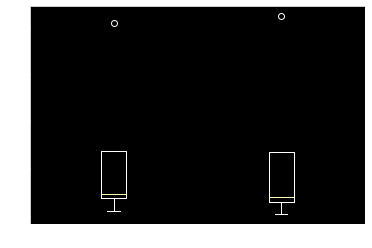

In [41]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots()
plt.boxplot(combined)
plt.xticks([1,2],["Labour", "liberal"])
plt.show()



In [46]:
#find the maximum negative issue for both
labor_s.iloc[labor_s.neg.argmax(), 0:2]
print(liberal_s.iloc[liberal_s.neg.argmax(), 0:2])
print(liberal_s.loc[30].text)




created                       Tue Oct 10 09:23:08 +0000 2017
text       @capital_hunter @LiberalNSW @sffAustralia @NSW...
Name: 30, dtype: object
@capital_hunter @LiberalNSW @sffAustralia @NSWNationals guns. guns. guns. death. killing. yeah! go. guns. death. #killthemall
